# Week 05: Visualization Techniques
**Course:** WMASDS04 - Introduction to Data Science with Python
<br>**Instructor:** Farhana Afrin, Department of Statistics, JU

**Outlines:**
- Pie Chart
- Bar Chart
- Scatter Plot
- Heatmap
- Line Plot
- Histogram
- Box Plot
- Violin Plot
- Time Series Plot

#### Import required libraries and packages

In [1]:
# for data analysis
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#### Read a csv file as pandas DataFrame

In [2]:
df = pd.read_csv('bmw.csv')

In [3]:
# print(type(df))
# display(df.head())
# display(df.tail())
# df.info()
df.dtypes
# df.sample(5,random_state = 4)
# df.columns
# df.index
df.shape

(10781, 8)

In [4]:
print('Number of Rows = ', df.shape[0])
print('Number of Columns = ', df.shape[1])

Number of Rows =  10781
Number of Columns =  8


#### Checking for missing values

In [5]:
# df.info()
df.isnull().sum()
df.notnull().sum()

model           10781
year            10781
price           10781
transmission    10781
mileage         10781
fuelType        10781
mpg             10781
engineSize      10781
dtype: int64

#### Count the number of unique values in columns

In [6]:
# df['model'].unique()
# df['transmission'].value_counts()
df['fuelType'].value_counts()

Diesel      7027
Petrol      3417
Hybrid       298
Other         36
Electric       3
Name: fuelType, dtype: int64

In [7]:
# print(df['model'].unique())
print(type(df['model'].unique()))
len(df['model'].unique())

<class 'numpy.ndarray'>


24

## Pie chart

<AxesSubplot:ylabel='transmission'>

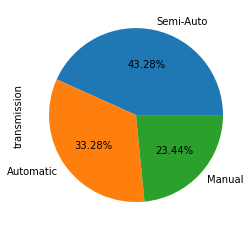

In [8]:
df['transmission'].value_counts().plot.pie(autopct = '%.2f%%')

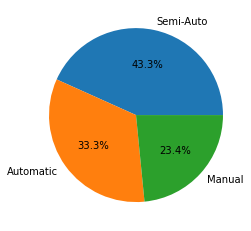

In [9]:
df['transmission'].value_counts().plot(kind = 'pie',
                                      autopct = '%.1f%%')
plt.ylabel('')
plt.show()

In [10]:
type(df['transmission'].value_counts())

pandas.core.series.Series

## Bar Plot

- How to set a title, xlabel and ylabel of a plot?
- How to change the range of x and y axis?

#### Find the percentage of unique values present in the 'fuelType' column


In [11]:
print(df["fuelType"].value_counts())

print(type(df["fuelType"].value_counts()))

df_fuelType = pd.DataFrame(df["fuelType"].value_counts())

display(df_fuelType.head())
print(df_fuelType.index)
print(df_fuelType.columns)

Diesel      7027
Petrol      3417
Hybrid       298
Other         36
Electric       3
Name: fuelType, dtype: int64
<class 'pandas.core.series.Series'>


,fuelType
Diesel,7027
Petrol,3417
Hybrid,298
Other,36
Electric,3


Index(['Diesel', 'Petrol', 'Hybrid', 'Other', 'Electric'], dtype='object')
Index(['fuelType'], dtype='object')


In [12]:
df_fuelType = pd.DataFrame(df['fuelType'].value_counts())
df_fuelType = df_fuelType.reset_index()
df_fuelType = df_fuelType.rename(columns = {'index':'fuelType',
                                           'fuelType':'no_of_cars'})
df_fuelType['% of cars'] = (df_fuelType['no_of_cars']/df.shape[0])*100

In [13]:
# df_fuelType['no_of_cars'].sum()
# df.shape[0]

In [14]:
df_fuelType

,fuelType,no_of_cars,% of cars
0,Diesel,7027,65.179482
1,Petrol,3417,31.694648
2,Hybrid,298,2.764122
3,Other,36,0.333921
4,Electric,3,0.027827


#### Barplot for the 'fuelType' column

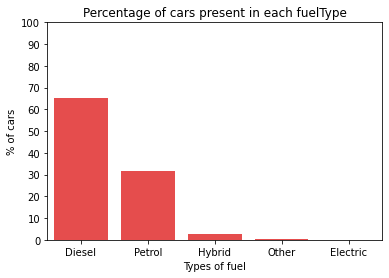

In [15]:
sns.barplot(x="fuelType", 
            y="% of cars", 
            data=df_fuelType, 
            color="red",
            alpha=0.8)

plt.xlabel("Types of fuel")
plt.ylabel("% of cars")
plt.title("Percentage of cars present in each fuelType")

plt.yticks(np.arange(0,101,10))

plt.show()

**barplot for model column**

In [16]:
df_model = pd.DataFrame(df['model'].value_counts())
df_model = df_model.reset_index()
df_model = df_model.rename(columns = {'index': 'Model','model': 'No_of_car'})
    
# df_model.columns
# df_model.index
df_model

,Model,No_of_car
0,3 Series,2443
1,1 Series,1969
2,2 Series,1229
3,5 Series,1056
4,4 Series,995
5,X1,804
6,X3,551
7,X5,468
8,X2,288
9,X4,179


<BarContainer object of 24 artists>

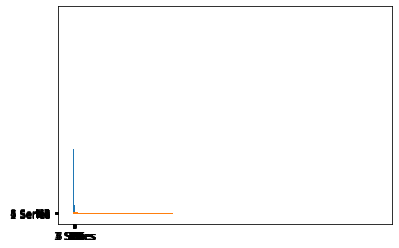

In [17]:
plt.bar(df_model['Model'], df_model['No_of_car'])
plt.barh(df_model['Model'], df_model['No_of_car'])

<AxesSubplot:xlabel='Model', ylabel='No_of_car'>

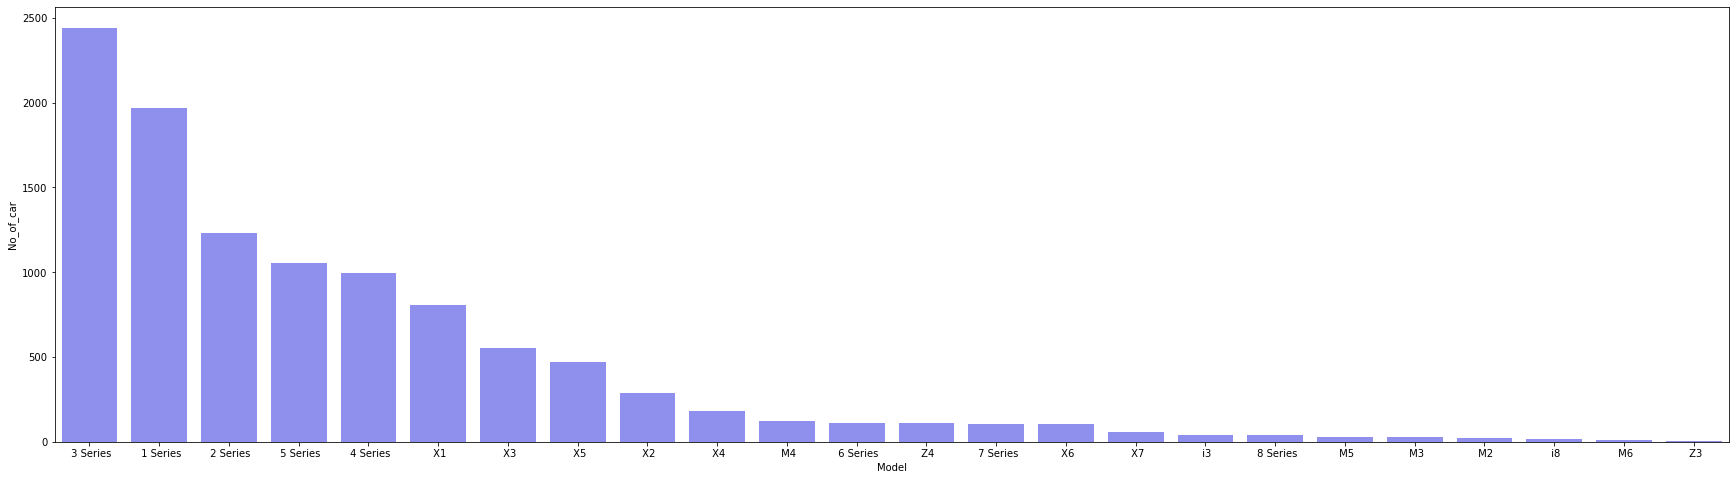

In [18]:
plt.figure(figsize = (30,8))
sns.barplot(x = 'Model', y= 'No_of_car',color = 'blue', data = df_model, alpha = 0.5)

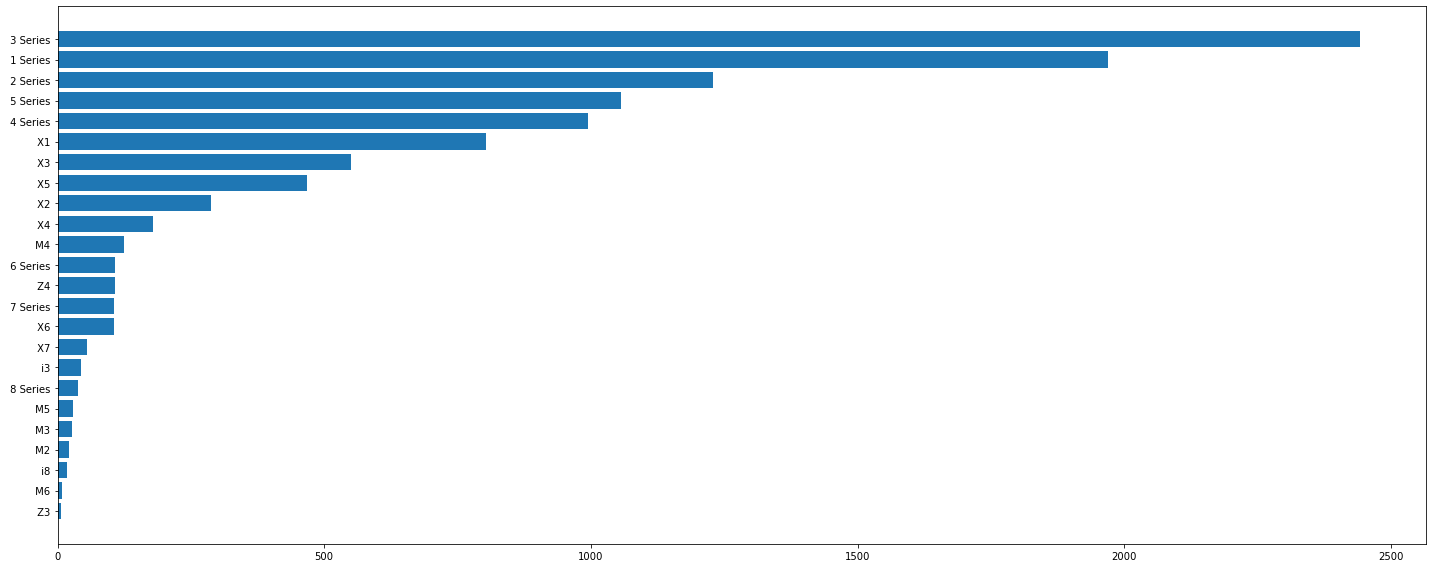

In [19]:
plt.figure(figsize = (20,8))
df_model = df_model.sort_values(by = ['No_of_car'], ascending = True)
plt.barh(df_model['Model'], df_model['No_of_car'], height = 0.8, left = 0)
plt.xticks(np.arange(0,2501, 500))
plt.tight_layout()
plt.show()

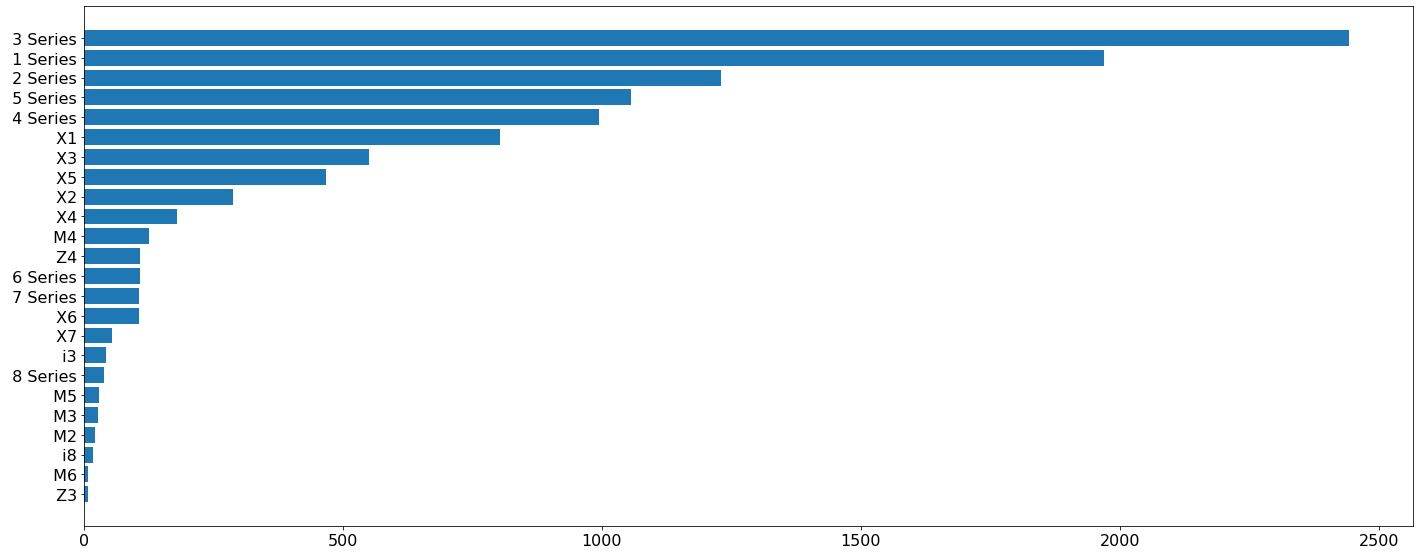

In [20]:
plt.rcParams.update({'font.size': 16})

plt.figure(figsize = (20,8))
df_model = df_model.sort_values(by = ['No_of_car'], ascending = True)
plt.barh(df_model['Model'], df_model['No_of_car'], height = 0.8, left = 0)

plt.tight_layout()
plt.show()

<BarContainer object of 24 artists>

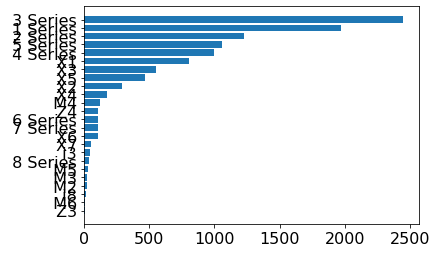

In [21]:
plt.barh(df_model['Model'], df_model['No_of_car'])

## Scatter Plot

#### Find the relation between the numerical variables

- Scatterplot of mileage vs price
- Scatterplot of mpg vs price
- Scatterplot of engineSize vs price

In [22]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
mpg             float64
engineSize      float64
dtype: object

In [23]:
df.describe()

,year,price,mileage,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,470.800000,6.600000


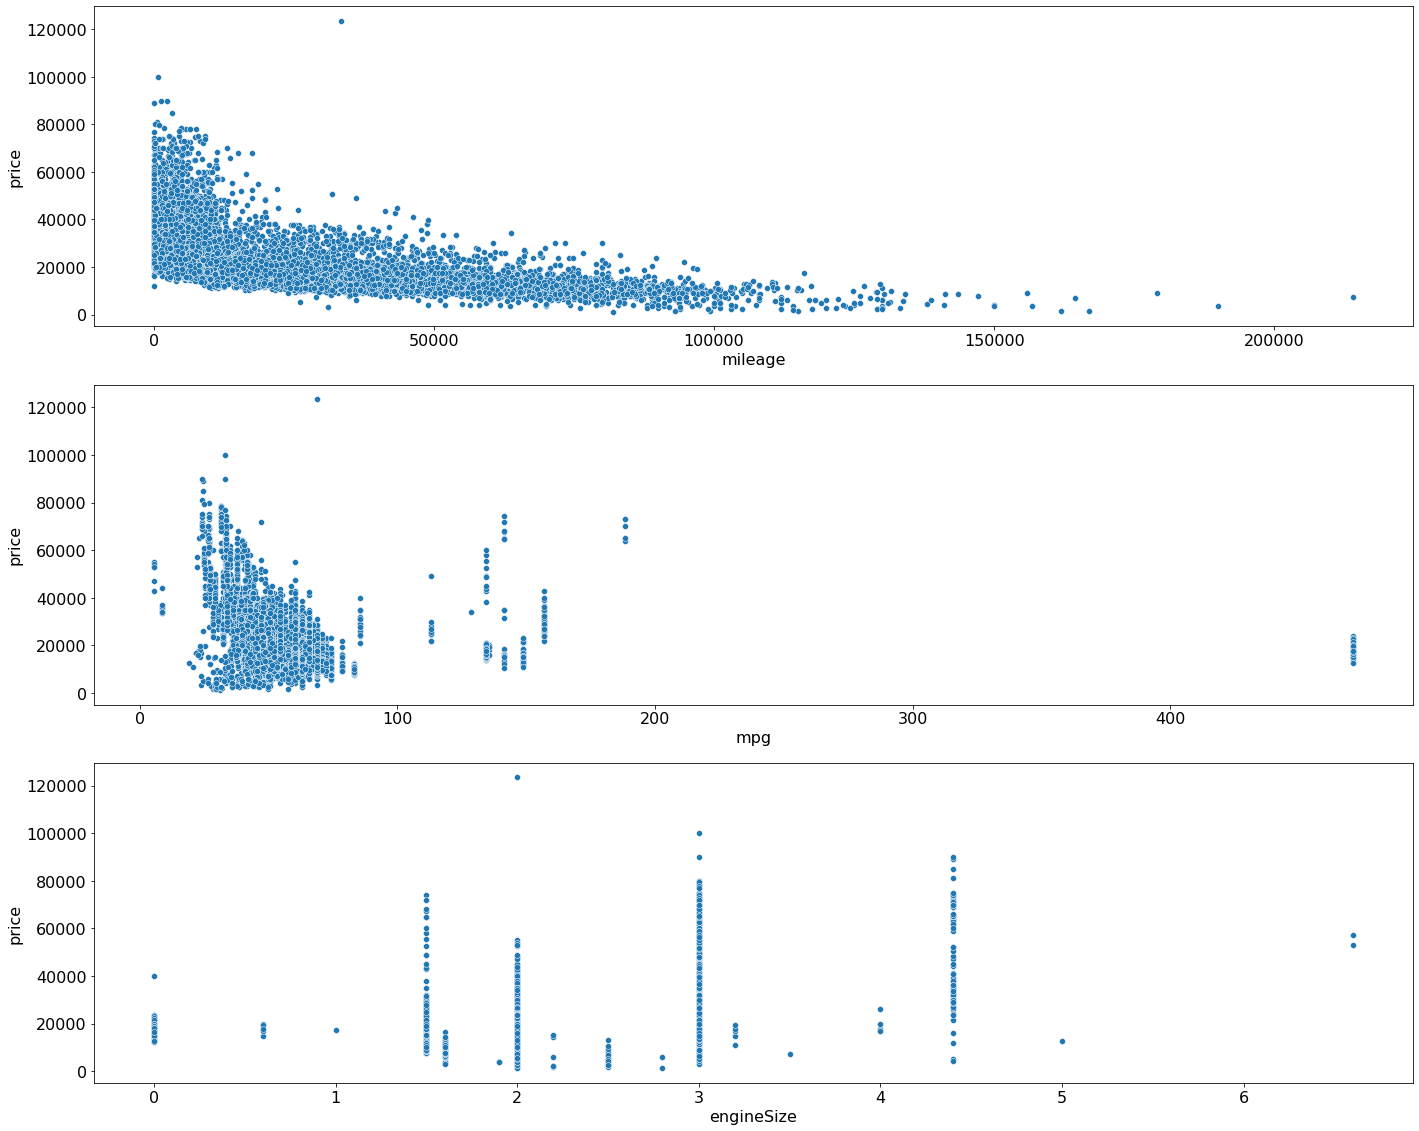

In [24]:
plt.figure(figsize=(20,16))

plt.subplot(3, 1, 1)
sns.scatterplot(x="mileage", y="price", data=df)

plt.subplot(3, 1, 2)
sns.scatterplot(x="mpg", y="price", data=df)

plt.subplot(3, 1, 3)
sns.scatterplot(x="engineSize", y="price", data=df)

plt.tight_layout()
plt.show()

#### using the hue parameter

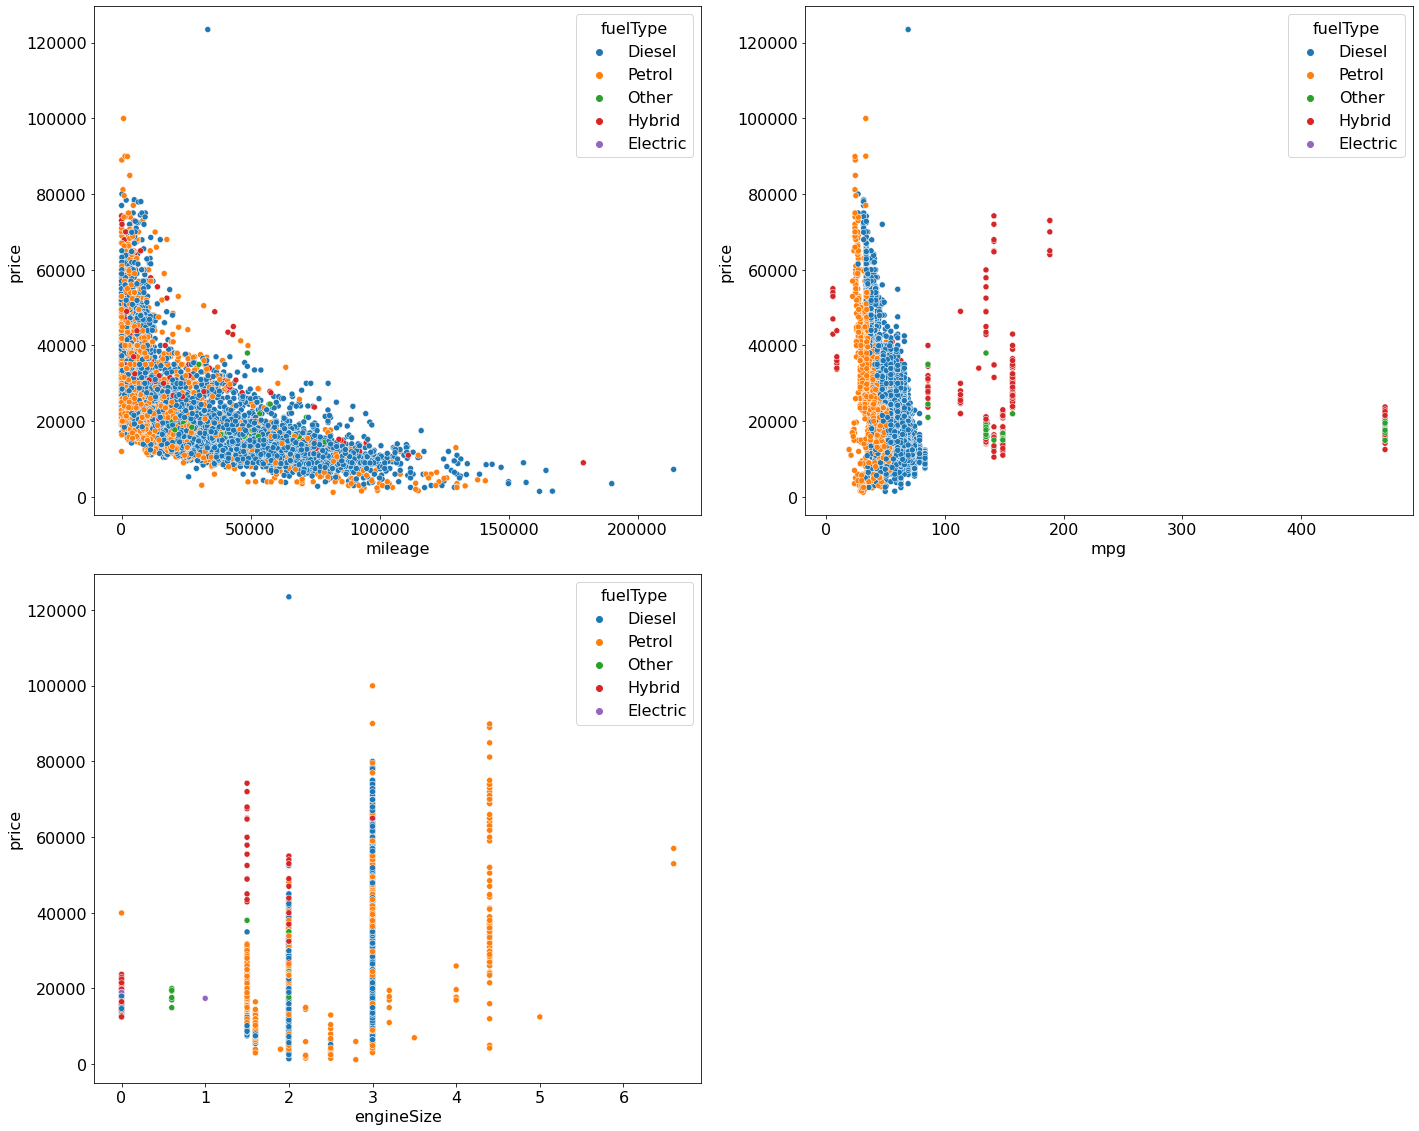

In [25]:
plt.figure(figsize=(20,16))

plt.subplot(2, 2, 1)
sns.scatterplot(x="mileage", y="price", data=df, hue="fuelType")

plt.subplot(2, 2, 2)
sns.scatterplot(x="mpg", y="price", data=df, hue="fuelType")

plt.subplot(2, 2, 3)
sns.scatterplot(x="engineSize", y="price", data=df, hue="fuelType")

plt.tight_layout()
plt.show()

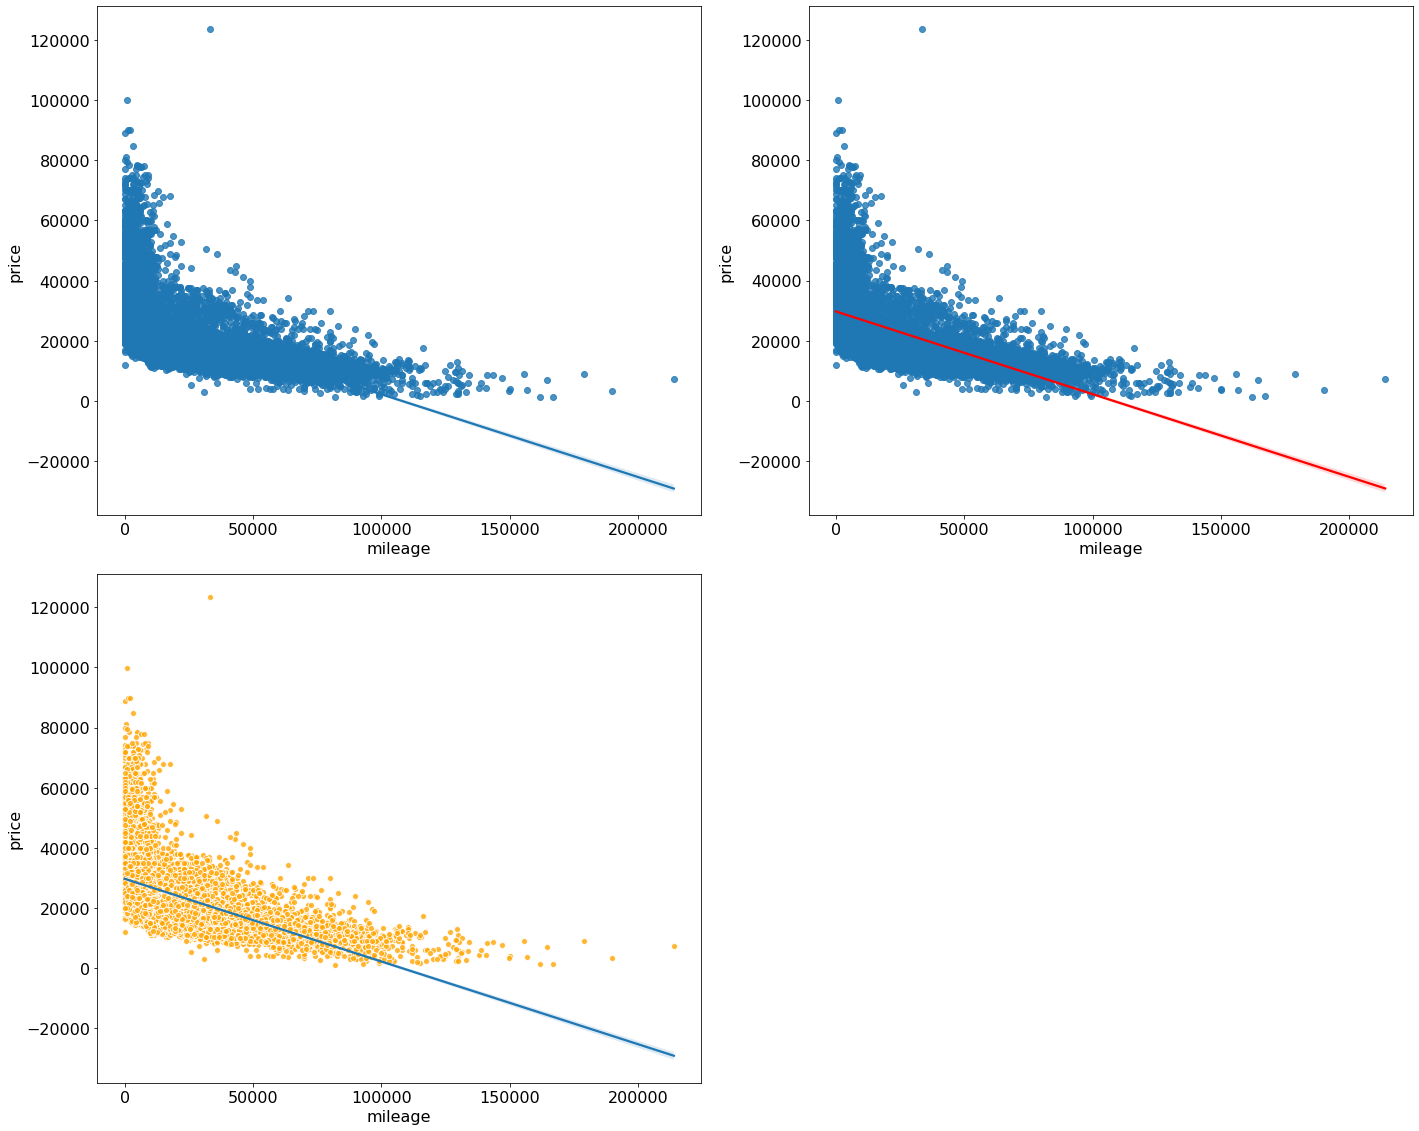

In [26]:
# Addding trend line
plt.figure(figsize=(20,16))

plt.subplot(2, 2, 1)
sns.regplot(x="mileage", y="price", data=df)

plt.subplot(2, 2, 2)
sns.regplot(x="mileage", y="price", data=df, line_kws={"color":"red"})

plt.subplot(2, 2, 3)
sns.regplot(x="mileage", y="price", data=df, scatter_kws={"color":"orange", "edgecolor":"white"})

plt.tight_layout()
plt.show()

### Pairplot

In [27]:
# # an example from the documentation
# penguins = sns.load_dataset("penguins")
# display(penguins.head())
# print(penguins.shape)
# # sns.pairplot(penguins)
# sns.pairplot(penguins, hue="species")
# plt.show()

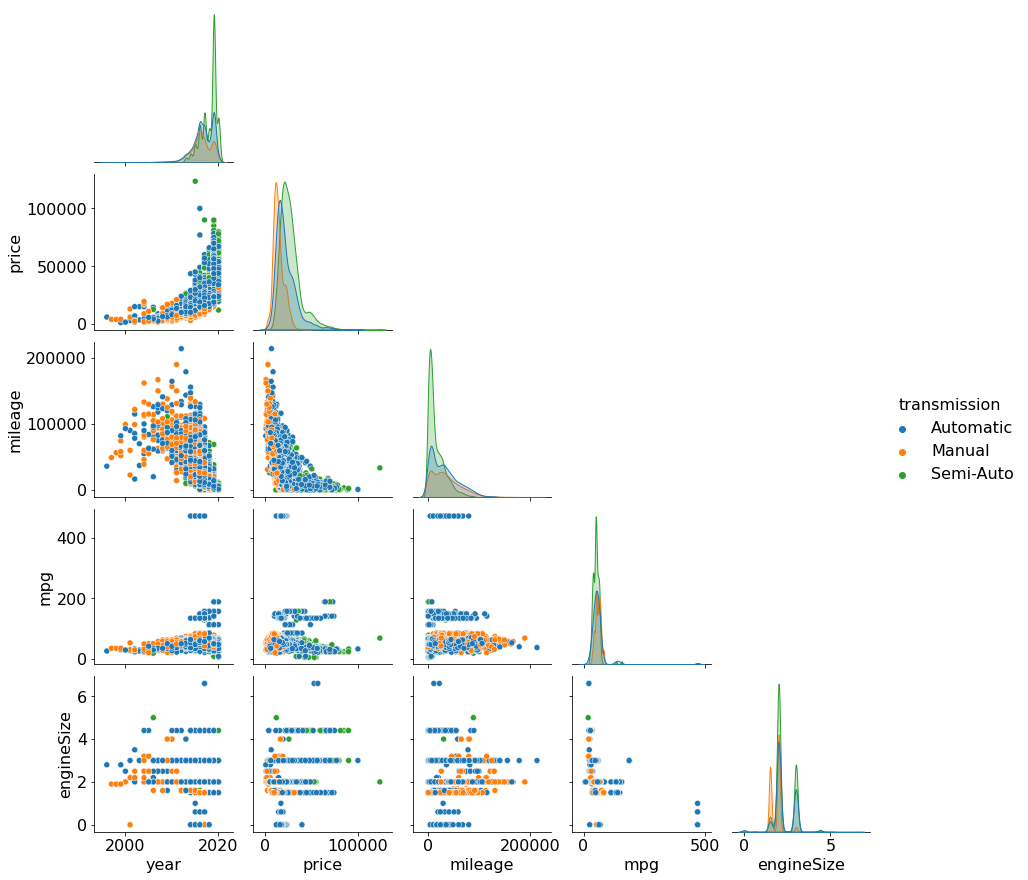

In [28]:
# sns.pairplot(df, corner=True)
sns.pairplot(df, corner=True, hue="transmission")

## Heatmap

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   mpg           10781 non-null  float64
 7   engineSize    10781 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 673.9+ KB


#### Assumptions:

- **Car price increases when engineSize increases** 
- **Car price increases when mpg increases** 
- **Car price decreases when the mileage increases**
- **When the engineSize increases, the mpg decreases** 
- **Car price increases with the latest year cars** 

In [30]:
df.corr()

,year,price,mileage,mpg,engineSize
year,1.000000,0.623756,-0.774382,-0.071762,-0.026337
price,0.623756,1.000000,-0.605397,-0.204882,0.460196
mileage,-0.774382,-0.605397,1.000000,0.118609,-0.002540
mpg,-0.071762,-0.204882,0.118609,1.000000,-0.399844
engineSize,-0.026337,0.460196,-0.002540,-0.399844,1.000000


<AxesSubplot:>

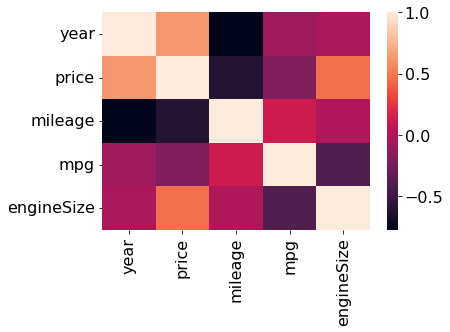

In [31]:
sns.heatmap(df.corr())

<AxesSubplot:>

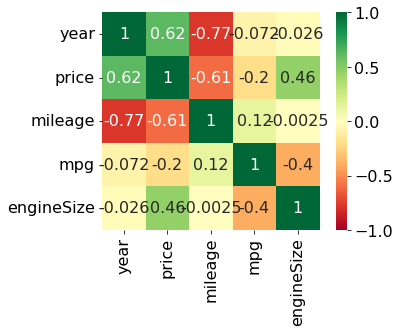

In [32]:
sns.heatmap(df.corr(), square=True, vmax=1.0, vmin=-1.0, cmap="RdYlGn", annot=True)

In [33]:
# Creating mask
correlation_matrix = df.corr()
display(correlation_matrix)

mask = np.zeros_like(correlation_matrix)
print(mask)

mask[np.triu_indices_from(mask)] = True
print(mask)

,year,price,mileage,mpg,engineSize
year,1.000000,0.623756,-0.774382,-0.071762,-0.026337
price,0.623756,1.000000,-0.605397,-0.204882,0.460196
mileage,-0.774382,-0.605397,1.000000,0.118609,-0.002540
mpg,-0.071762,-0.204882,0.118609,1.000000,-0.399844
engineSize,-0.026337,0.460196,-0.002540,-0.399844,1.000000


[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]]


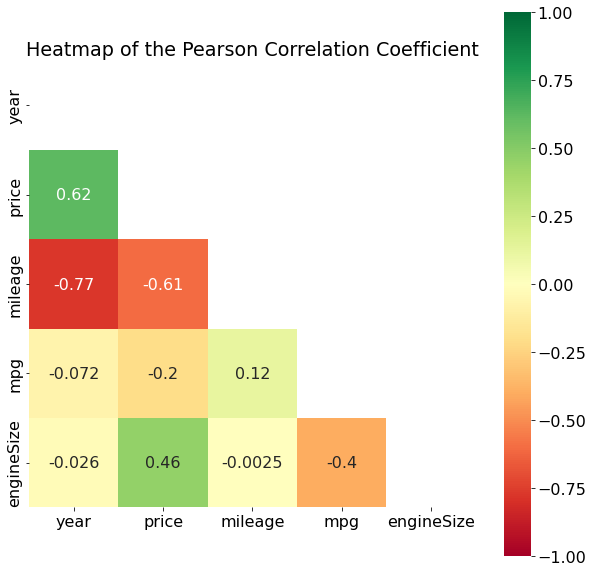

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, 
            square=True,
            vmax=1.0, vmin=-1.0,
            cmap="RdYlGn",
            annot=True,
            mask=mask)

plt.title("Heatmap of the Pearson Correlation Coefficient")
plt.show()

#### observations:

- **Car price increases when engineSize increases:** True
- **Car price increases when mpg increases**: False
- **Car price decreases when the mileage increases**: True
- **When the engineSize increases, the mpg decreases**: True
- **Car price increases with the latest year cars** : True

### Line Plot
- How to create a user defined function?
- How to draw the equation of a straight line?
- How to draw multiple line charts in the same figure?
- How to change the color, linestyle and marker of a figure?
- How to modify the legend of a figure?
- How to create Subplot?


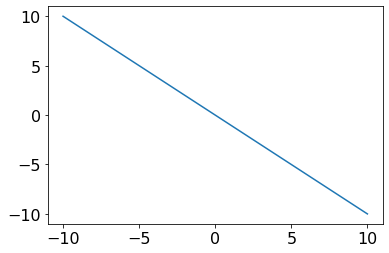

In [35]:
m = -1
c = 0
x = np.arange(-10,11,2)
y = m*x+c
plt.plot(x,y)

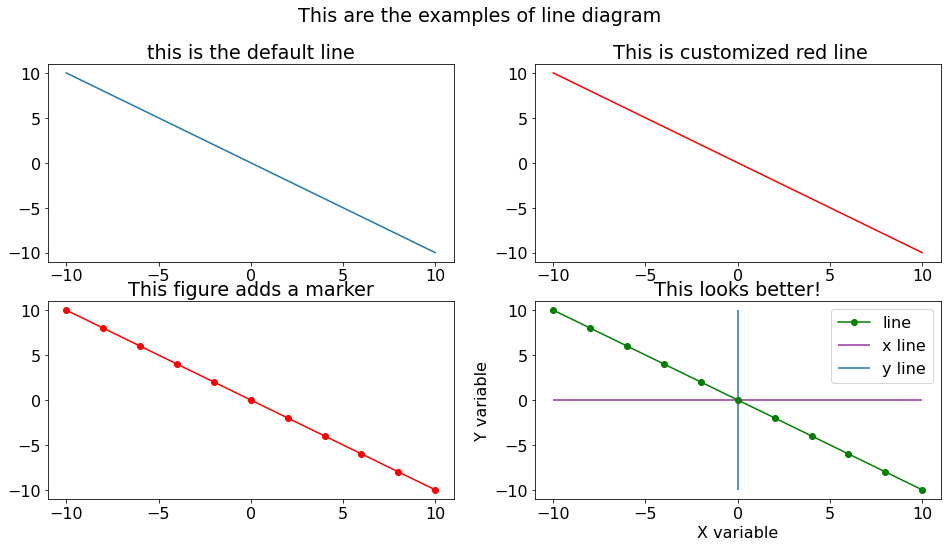

In [36]:
# Subplot with same dataset formated differently

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.plot(x,y)
plt.title('this is the default line')

plt.subplot(2,2,2)
plt.plot(x,y, color = 'Red')
plt.title(' This is customized red line')

plt.subplot(2,2,3)
plt.plot(x,y, color = 'Red', marker = 'o')
plt.title('This figure adds a marker')

plt.subplot(2,2,4)
plt.plot(x,y, color = 'Green', marker = 'o')
plt.hlines(0,-10,10, color = 'Purple', alpha = .8)
plt.vlines(0,-10,10)
plt.xlabel('X variable')
plt.ylabel('Y variable')
plt.title('This looks better!')
plt.legend(['line', 'x line', 'y line'], loc = 'upper right')

plt.suptitle('This are the examples of line diagram')
plt.show()

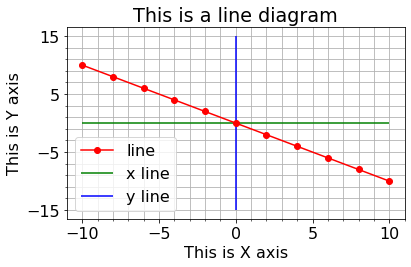

In [37]:
# Formating plot: linestyle, color, marker, title, label, gridlines, axes ticks, legend
m = -1
c = 0
x = np.arange(-10,11,2)
y = m*x+c

plt.figure(figsize = (6,4))
plt.plot(x,y, color = 'Red', marker = 'o')

plt.hlines(0, -10, 10, color="green", linestyles="-")
plt.vlines(0, -15, 15, color="blue", linestyles="-")

plt.xticks(np.arange(-10,11,5))
plt.yticks(np.arange(-15,16,10))
plt.minorticks_on()

plt.grid(True, which='both')
plt.legend(['line', 'x line', 'y line'], loc = 'lower left')

plt.xlabel("This is X axis")
plt.ylabel("This is Y axis")

plt.title('This is a line diagram')
plt.tight_layout()
plt.show()

In [38]:
# Creating multiple straight lines using function
def line(x, m, c):
    df = pd.DataFrame() #creating blank dataframe
    df['x'] = x         # add a column, x
    df['y'] = m*x+c
    return df
    

In [39]:
l1 = line(np.arange(-5,6,1), 1, 1)
l2 = line(np.arange(-5,6,1), -1, 1)
l3 = line(np.arange(-5,6,1), 1, -1)
l4 = line(np.arange(-5,6,1), -1, -1)
# l3

In [40]:
# Create a lineplot function
def lineplot(x,y, title, color):
    plt.plot(x,y,color = color, marker= '.')
    plt.hlines(0,-5,6, color = 'Black')
    plt.vlines(0, -5, 6, color = 'Black')
    plt.xticks(np.arange(-6, 7, 2))
    plt.yticks(np.arange(-6, 7, 2))
    plt.minorticks_on()
    plt.grid(True, which = 'both')
    plt.xlabel('x values')
    plt.ylabel('y values')
    plt.title(title)

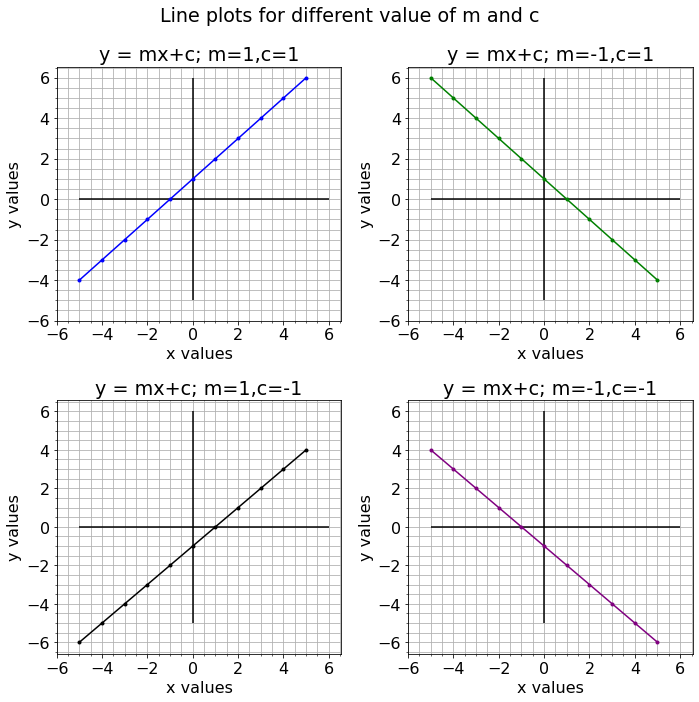

In [41]:
# Creating subplots
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
lineplot(l1['x'],l1['y'],'y = mx+c; m=1,c=1','blue')

plt.subplot(2,2,2)
lineplot(l2['x'],l2['y'],'y = mx+c; m=-1,c=1','green')

plt.subplot(2,2,3)
lineplot(l3['x'],l3['y'],'y = mx+c; m=1,c=-1','black')

plt.subplot(2,2,4)
lineplot(l4['x'],l4['y'],'y = mx+c; m=-1,c=-1','purple')

plt.suptitle('Line plots for different value of m and c')
plt.tight_layout()
plt.show()

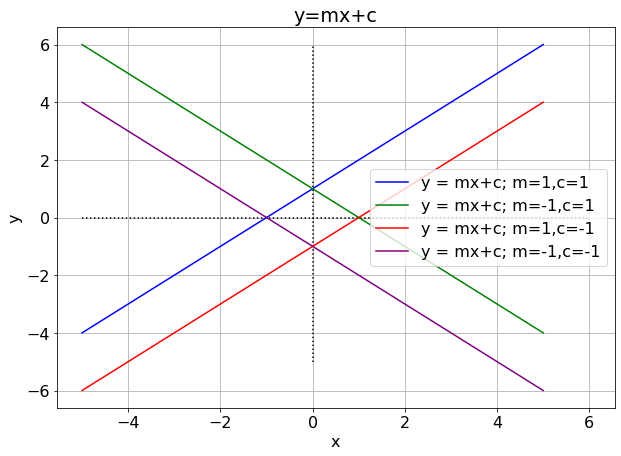

In [42]:
# Multiple lineplots in the same figure

plt.figure(figsize = (10,7))

plt.plot(l1['x'],l1['y'], label='y = mx+c; m=1,c=1',color='blue')
plt.plot(l2['x'],l2['y'],label='y = mx+c; m=-1,c=1',color='green')
plt.plot(l3['x'],l3['y'],label = 'y = mx+c; m=1,c=-1',color='red')
plt.plot(l4['x'],l4['y'],label='y = mx+c; m=-1,c=-1',color='purple')
plt.vlines(0, -5, 6, linestyles=':', colors="black")
plt.hlines(0, -5, 6, linestyles=':', colors="black")
plt.title("y=mx+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="center right") 
plt.grid()
plt.show()

## Histogram, Distribution, ECDF

Dataset: cellular usage dataset that consists of records of actual cell phone that include specific features such as

1. **Account_Length**: the number of days the customer has the subscription with the telecom company

2. **Vmail_Message**: the total number of voicemails the customer has sent

3. **Total_mins**: the total number of minutes the customer has talked over the phone

4. **CustServ_Calls**: the number of customer service calls the customer made

5. **Churn**: yes and no - indicating whether or not the customer has churned

6. **Intl_Plan**: yes and no - indicating whether or not the customer has international plan or not

7. **Vmail_Plan**: yes and no - indicating whether or not the customer has voicemail plan or not

8. **Total_calls**: the total number of calls the customer has made

9. **Total_charges**: the total amount of bill in $ the customer has paid

In [43]:
df = pd.read_csv("telecom_data.csv")

display(df.head())
# print(df.info())
# print(df.shape)
# display(df.describe())
# display(df.describe(include=['O']))

,Account_Length,Vmail_Message,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Total_mins,Total_calls,Total_charges
0,128,25,1,no,no,yes,717.2,303,320.26
1,107,26,1,no,no,yes,625.2,332,313.64
2,137,0,0,no,no,no,539.4,333,224.89
3,84,0,2,no,yes,no,564.8,255,263.70
4,75,0,3,no,yes,no,512.0,359,238.99


## Histogram

<AxesSubplot:xlabel='Total_charges', ylabel='Probability'>

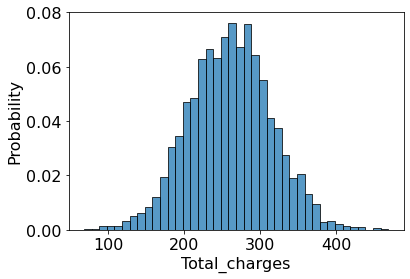

In [44]:
sns.histplot(x="Total_charges", data=df, binwidth = 10, stat = 'probability')

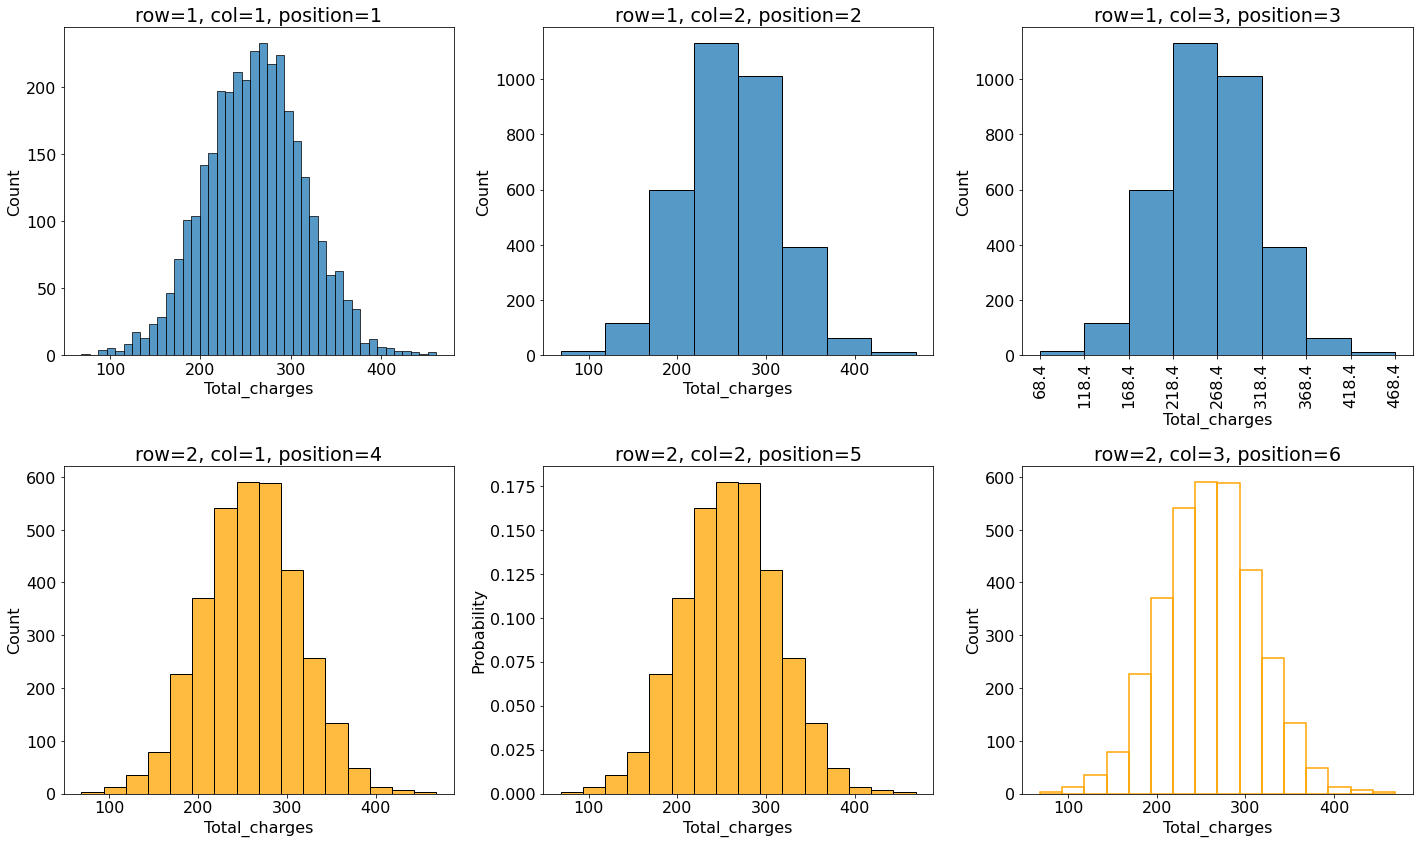

In [45]:
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.histplot(x="Total_charges", data=df)
plt.title("row=1, col=1, position=1")

plt.subplot(2,3,2)
sns.histplot(x="Total_charges", data=df, binwidth=50)
plt.title("row=1, col=2, position=2")

plt.subplot(2,3,3)
sns.histplot(x="Total_charges", data=df, binwidth=50)
plt.xticks(np.arange(df["Total_charges"].min(), df["Total_charges"].max()+51, 50), rotation=90)
plt.title("row=1, col=3, position=3")

plt.subplot(2,3,4)
sns.histplot(x="Total_charges", data=df, binwidth=25, color="orange")
plt.title("row=2, col=1, position=4")

plt.subplot(2,3,5)
sns.histplot(x="Total_charges", data=df, binwidth=25, color="orange", stat="probability")
plt.title("row=2, col=2, position=5")

plt.subplot(2,3,6)
sns.histplot(x="Total_charges", data=df, binwidth=25, color="orange", fill=False)
plt.title("row=2, col=3, position=6")

plt.tight_layout()
plt.show()

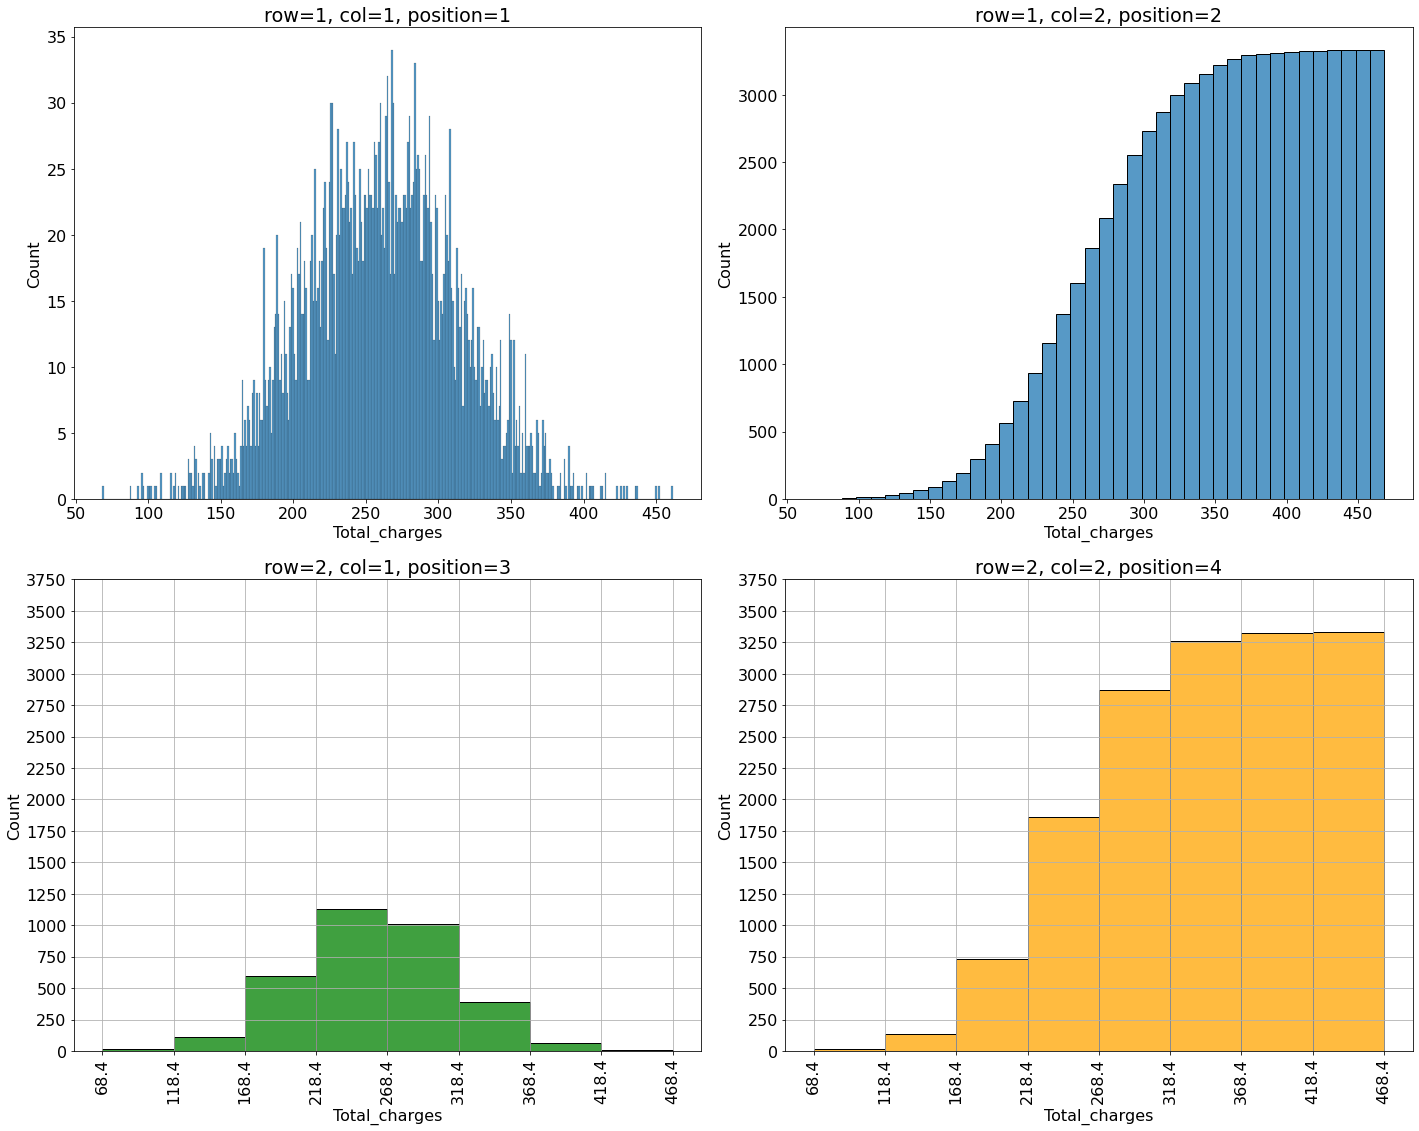

In [46]:
plt.figure(figsize=(20,16))

plt.subplot(2,2,1)
sns.histplot(x="Total_charges", data=df, binwidth=1)
plt.title("row=1, col=1, position=1")

plt.subplot(2,2,2)
sns.histplot(x="Total_charges", data=df, binwidth=10, cumulative=True)
plt.title("row=1, col=2, position=2")

plt.subplot(2,2,3)
sns.histplot(x="Total_charges", data=df, binwidth=50, color="green")
plt.xticks(np.arange(df["Total_charges"].min(), df["Total_charges"].max()+51, 50), rotation=90)
plt.grid()
plt.yticks(np.arange(0,4000,250))
plt.title("row=2, col=1, position=3")

plt.subplot(2,2,4)
sns.histplot(x="Total_charges", data=df, binwidth=50, cumulative=True, color="orange")
plt.yticks(np.arange(0,4000,250))
plt.xticks(np.arange(df["Total_charges"].min(), df["Total_charges"].max()+51, 50), rotation=90)
plt.grid()
plt.title("row=2, col=2, position=4")

plt.tight_layout()
plt.show()

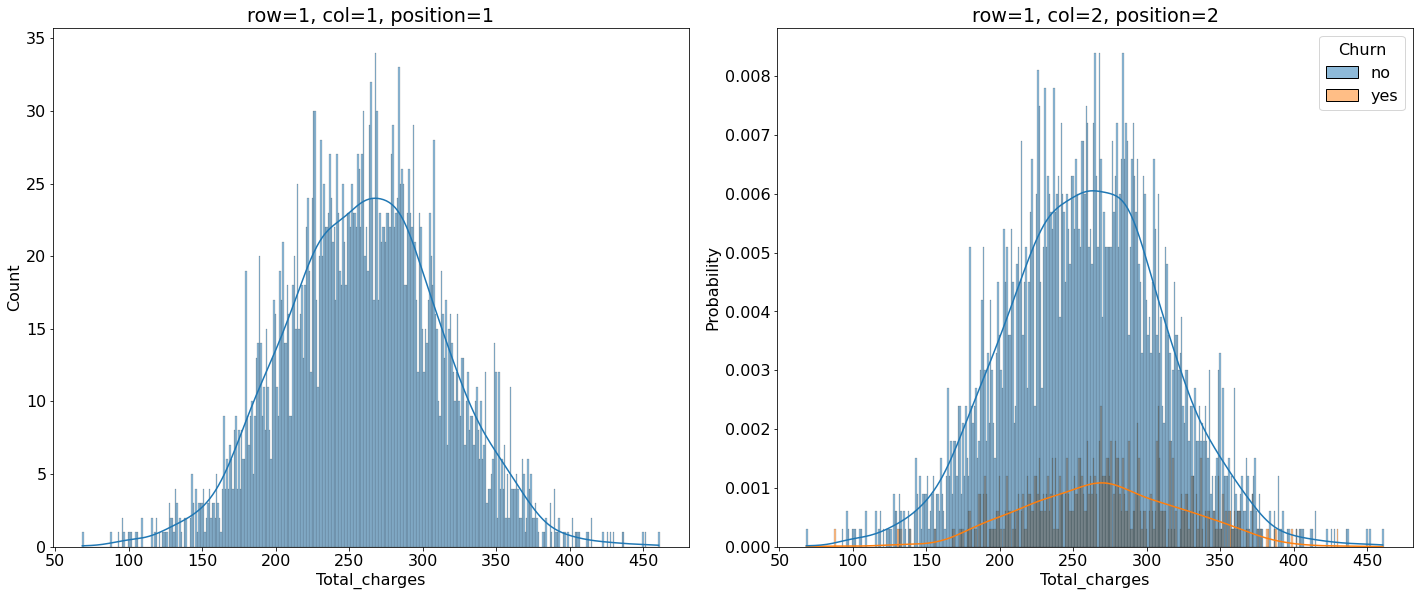

In [47]:
plt.figure(figsize=(20,16))

plt.subplot(2,2,1)
sns.histplot(x="Total_charges", data=df, binwidth=1, kde=True)
plt.title("row=1, col=1, position=1")

plt.subplot(2,2,2)
sns.histplot(x="Total_charges", data=df, binwidth=1, kde=True, hue="Churn", stat = "probability")
plt.title("row=1, col=2, position=2")

plt.tight_layout()
plt.show()

In [48]:
df['Total_charges'].sort_values()[1:2]

3247    87.62
Name: Total_charges, dtype: float64

## Box plot 

<AxesSubplot:ylabel='Total_charges'>

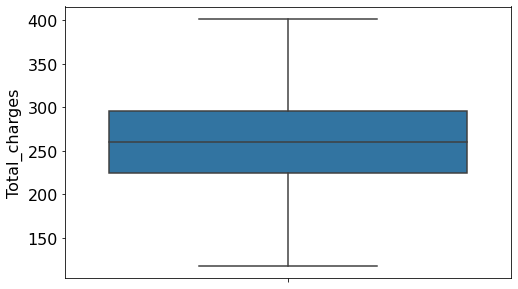

In [49]:
plt.figure(figsize=(8,5))
sns.boxplot(y = "Total_charges", data=df, showfliers=False)

1. min, 
2. first quartile (25th percentile), 
3. median (50th percentile)
4. third quartile (75th percentile)
5. max
- range = max-min
- IQR (inter-quartile range) = third quartile - first quartile

In [50]:
# separate numerical columns
num_cols = []

for col in df.columns:
    if df[col].dtypes != "O":
        num_cols.append(col)
#         print(num_cols)

print(num_cols)

['Account_Length', 'Vmail_Message', 'CustServ_Calls', 'Total_mins', 'Total_calls', 'Total_charges']


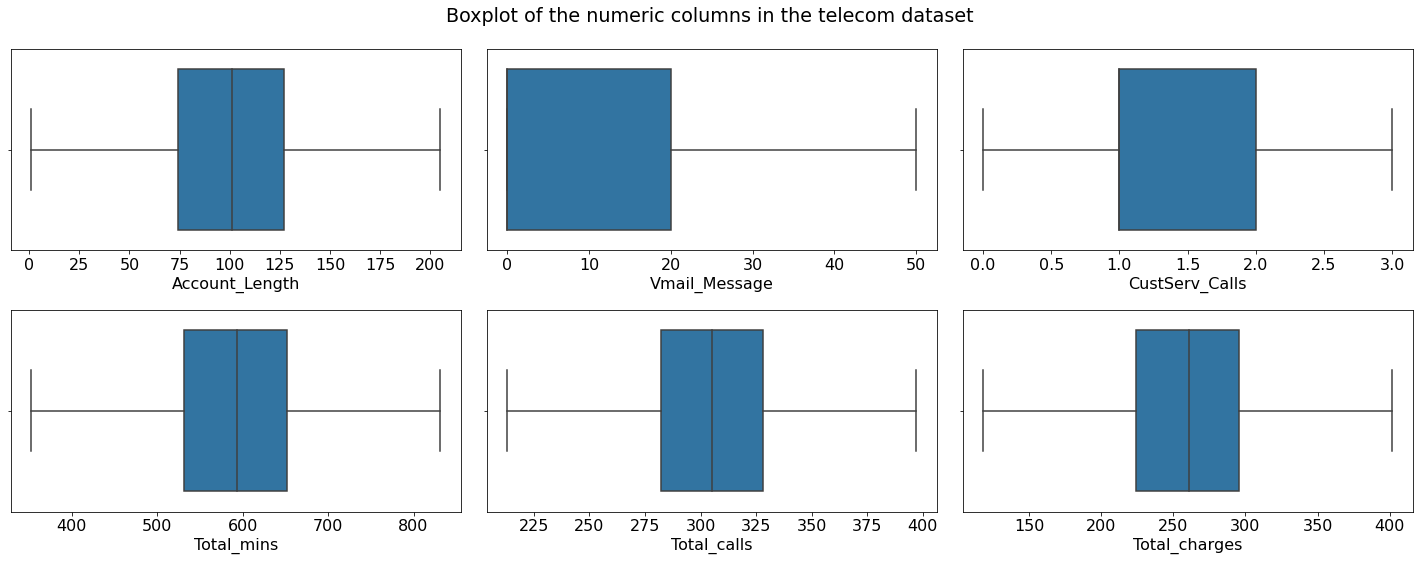

In [51]:
plt.figure(figsize=(20,8)) # width, height

for index in range(len(num_cols)):
    
#     print("index = ", index, "position = ", index+1, "column name = ", num_cols[index])
    
    plt.subplot(2,3,index+1)
    sns.boxplot(x=num_cols[index], data=df, showfliers=False)

plt.suptitle("Boxplot of the numeric columns in the telecom dataset")
plt.tight_layout()
plt.show()

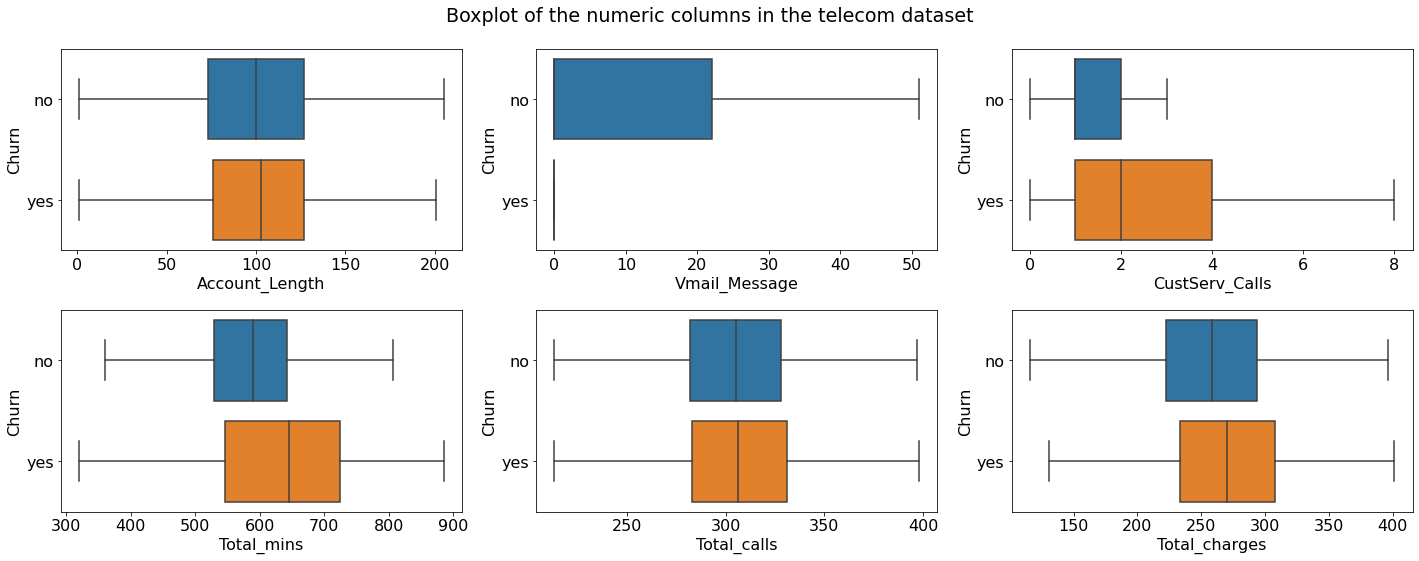

In [52]:
# Adding categorical features

plt.figure(figsize=(20,8)) # width, height

for index in range(len(num_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(x=num_cols[index], data=df, showfliers=False, y=df["Churn"])

plt.suptitle("Boxplot of the numeric columns in the telecom dataset")
plt.tight_layout()
plt.show()

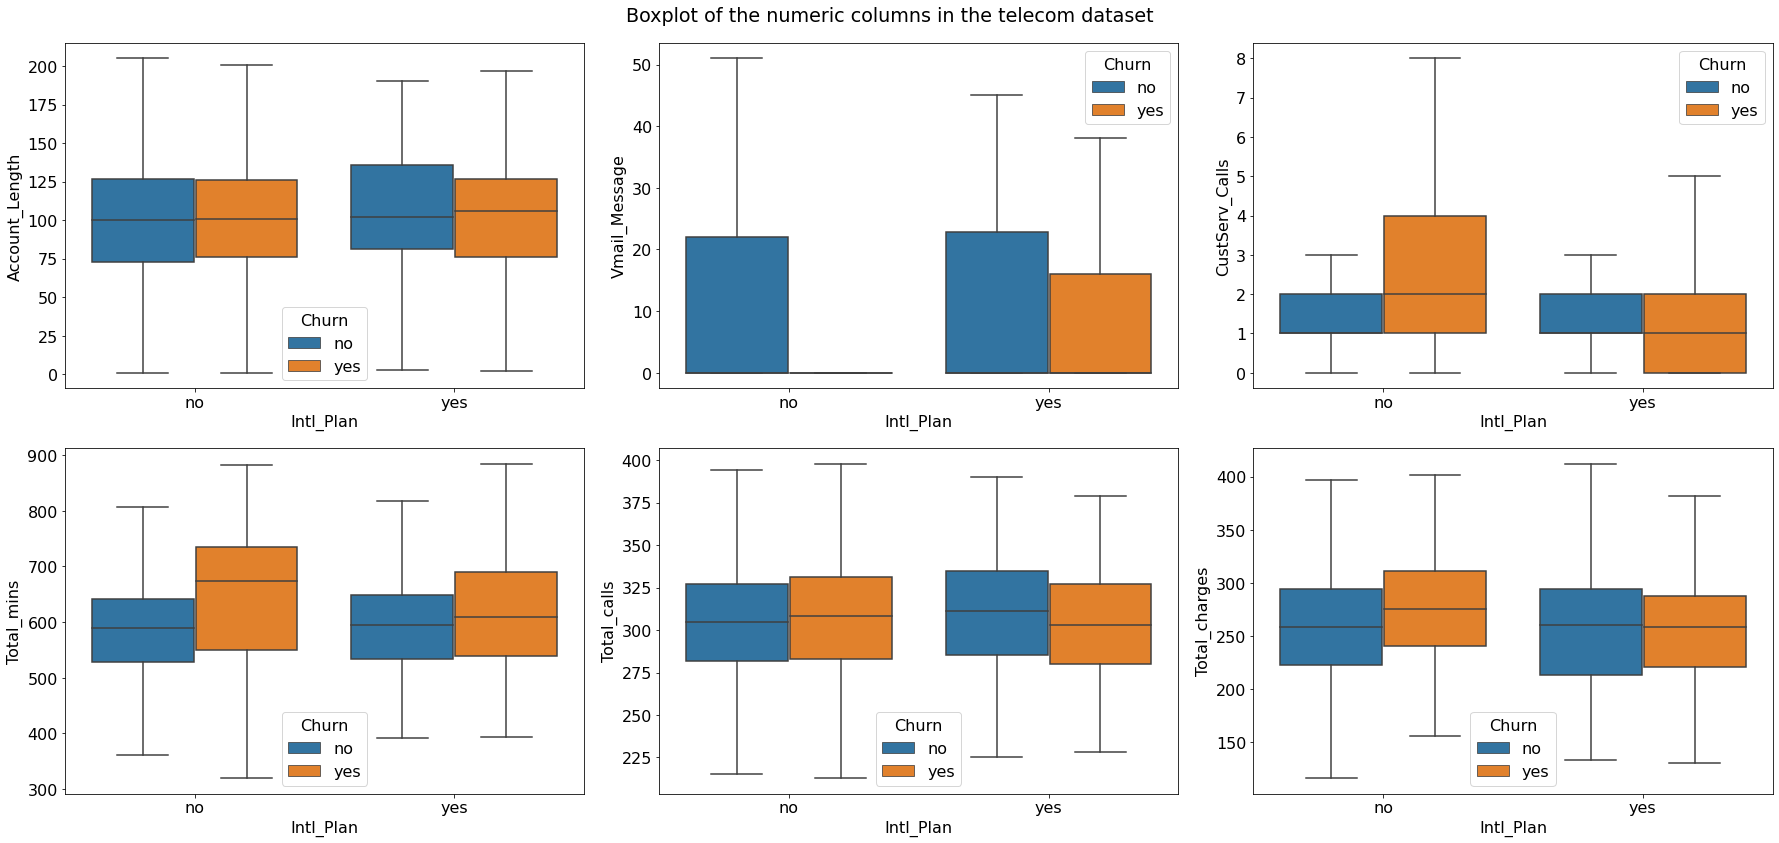

In [53]:
plt.figure(figsize=(25,12)) # width, height

for index in range(len(num_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(y=df[num_cols[index]], x=df["Intl_Plan"], hue=df["Churn"], showfliers=False)

plt.suptitle("Boxplot of the numeric columns in the telecom dataset")
plt.tight_layout()
plt.show()

## Violin Plot

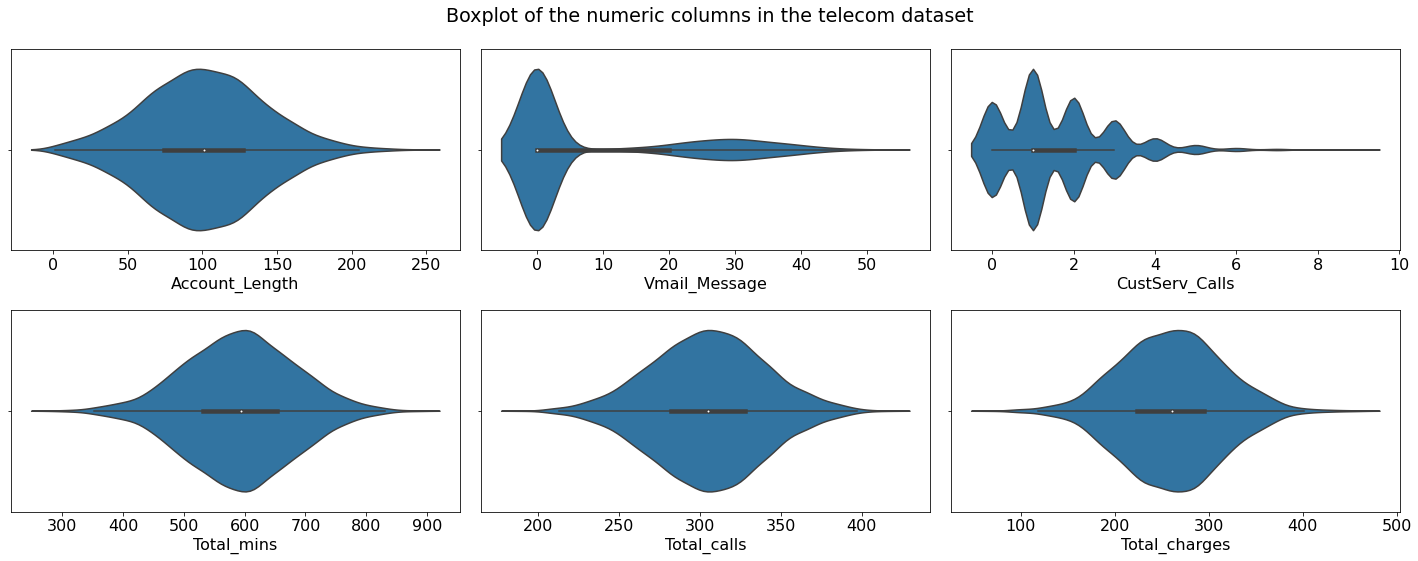

In [54]:
plt.figure(figsize=(20,8)) # width, height

for index in range(len(num_cols)): 
    plt.subplot(2,3,index+1)
    sns.violinplot(x=num_cols[index], data=df, showfliers=False)

plt.suptitle("Boxplot of the numeric columns in the telecom dataset")
plt.tight_layout()
plt.show()

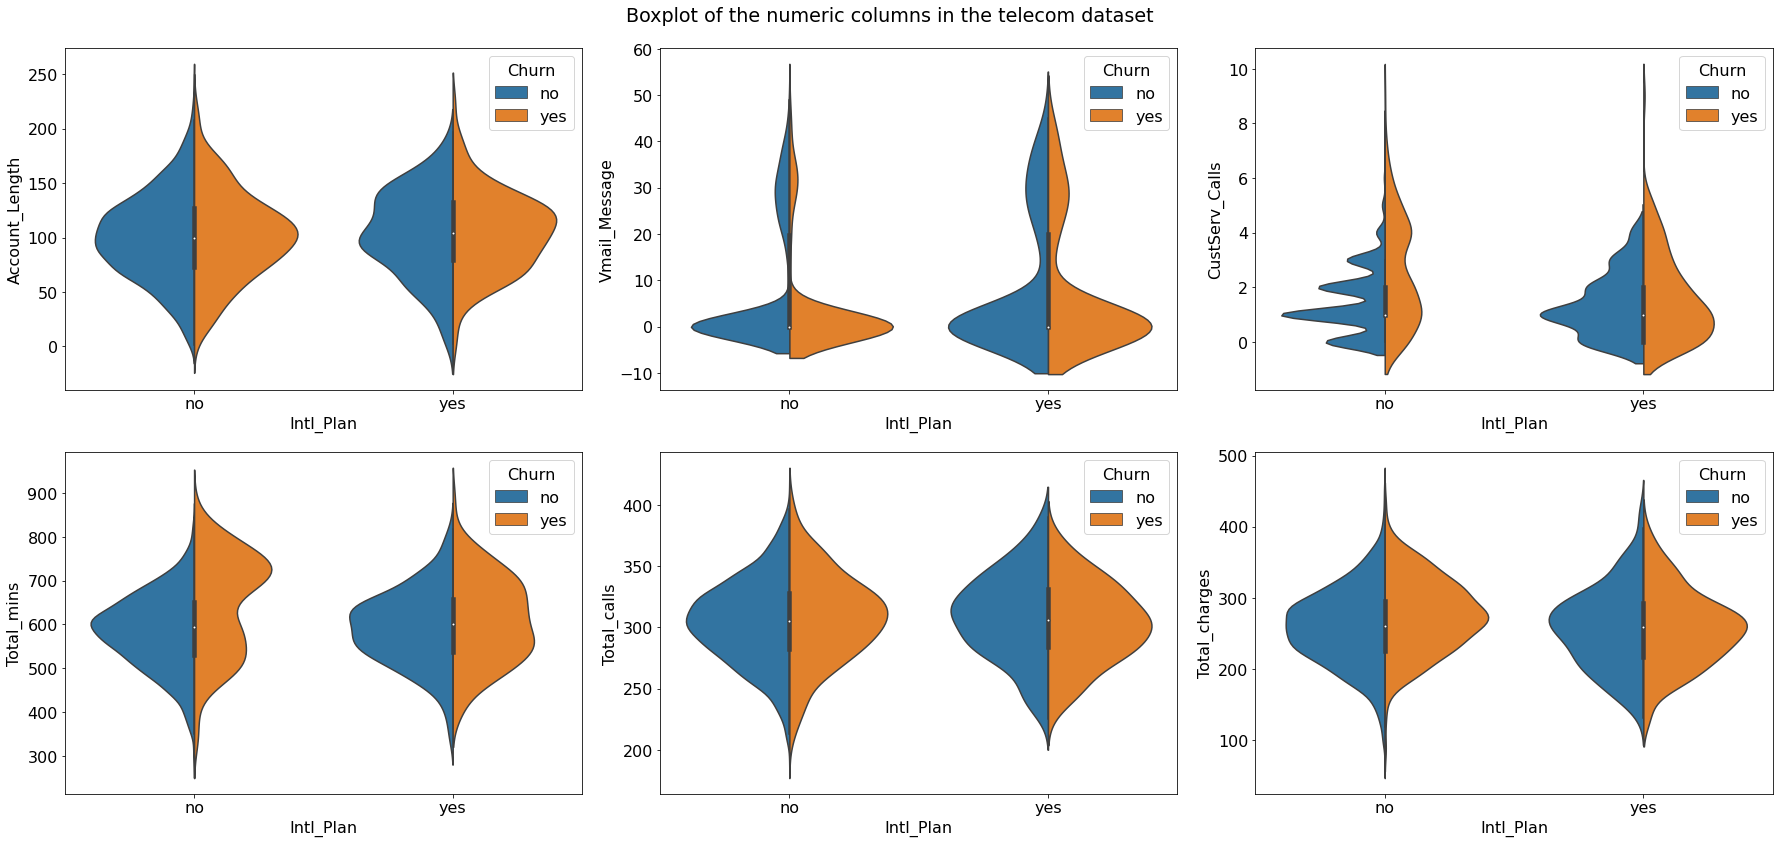

In [55]:
plt.figure(figsize=(25,12)) # width, height

for index in range(len(num_cols)): 
    plt.subplot(2,3,index+1)
    sns.violinplot(y=df[num_cols[index]], x=df["Intl_Plan"], hue=df["Churn"], showfliers=False, split=True)

plt.suptitle("Boxplot of the numeric columns in the telecom dataset")
plt.tight_layout()
plt.show()

## Time Series Plot

In [56]:
# df['year'].unique()

In [57]:
df.head()

,Account_Length,Vmail_Message,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Total_mins,Total_calls,Total_charges
0,128,25,1,no,no,yes,717.2,303,320.26
1,107,26,1,no,no,yes,625.2,332,313.64
2,137,0,0,no,no,no,539.4,333,224.89
3,84,0,2,no,yes,no,564.8,255,263.70
4,75,0,3,no,yes,no,512.0,359,238.99


In [58]:
# df[df['model']==' 5 Series']

In [59]:
earthquakes = pd.read_csv("earthquakes.csv")

display(earthquakes.head())
display(earthquakes.tail())
print(earthquakes.info())
print(earthquakes.shape)

,date,Year,earthquakes_per_year
0,1900-01-01,1900,13.0
1,1901-01-01,1901,14.0
2,1902-01-01,1902,8.0
3,1903-01-01,1903,10.0
4,1904-01-01,1904,16.0


,date,Year,earthquakes_per_year
94,1994-01-01,1994,15.0
95,1995-01-01,1995,25.0
96,1996-01-01,1996,22.0
97,1997-01-01,1997,20.0
98,1998-01-01,1998,16.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  99 non-null     object 
 1   Year                  99 non-null     int64  
 2   earthquakes_per_year  99 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB
None
(99, 3)


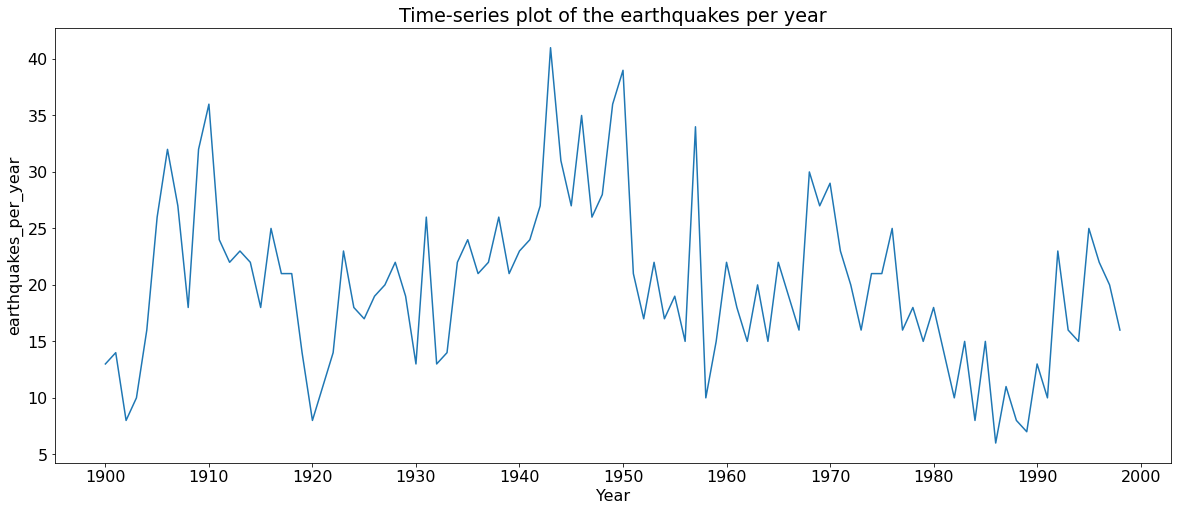

In [60]:
plt.figure(figsize=(20,8))
sns.lineplot(x="Year", y="earthquakes_per_year", data=earthquakes)

plt.title("Time-series plot of the earthquakes per year")
plt.xticks(np.arange(earthquakes["Year"].min(), earthquakes["Year"].max()+10, 10))
# plt.grid()
plt.show()

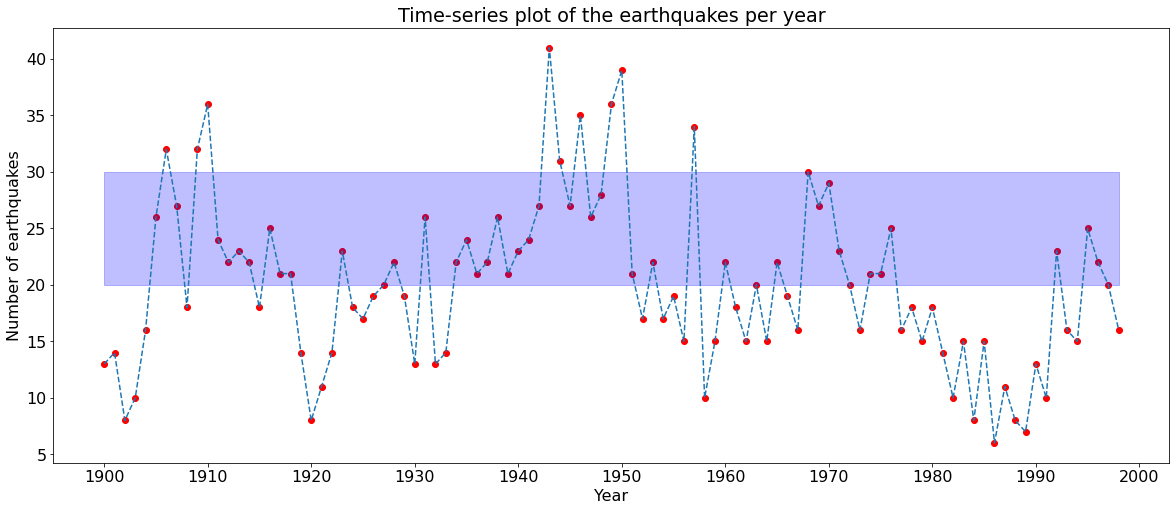

In [61]:
plt.figure(figsize=(20,8))
plt.plot(earthquakes["Year"], earthquakes["earthquakes_per_year"], linestyle="--")
plt.scatter(earthquakes["Year"], earthquakes["earthquakes_per_year"], marker="o", color="red")

plt.fill_between(earthquakes["Year"], 20, 30, color="b", alpha=0.25)

plt.title("Time-series plot of the earthquakes per year")
plt.xticks(np.arange(earthquakes["Year"].min(), earthquakes["Year"].max()+10, 10))
# plt.grid()

plt.xlabel("Year")
plt.ylabel("Number of earthquakes")
plt.show()

In [62]:
co2 = pd.read_csv("co2.csv")
co2['date'] = pd.to_datetime(co2['date'])

display(co2.head())
display(co2.tail())
display(co2.info())
print(co2.shape)

,date,CO2_ppm
0,1958-03-01,315.71
1,1958-04-01,317.45
2,1958-05-01,317.50
3,1958-06-01,317.10
4,1958-07-01,315.86


,date,CO2_ppm
722,2018-05-01,411.24
723,2018-06-01,410.79
724,2018-07-01,408.71
725,2018-08-01,406.99
726,2018-09-01,405.51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     727 non-null    datetime64[ns]
 1   CO2_ppm  727 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.5 KB


None

(727, 2)


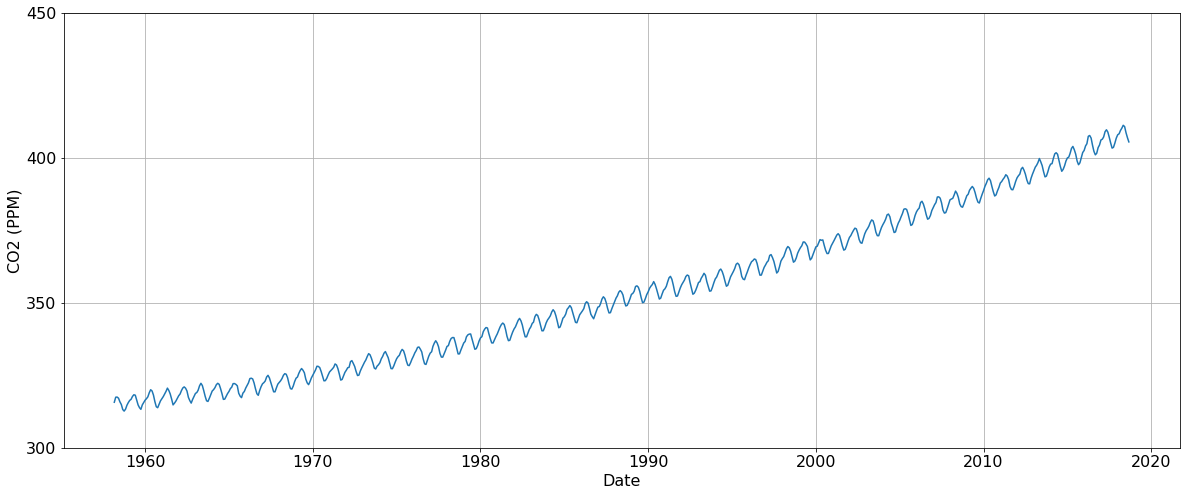

In [63]:
plt.figure(figsize=(20,8))
plt.plot(co2["date"], co2["CO2_ppm"])

plt.xlabel("Date")
plt.ylabel("CO2 (PPM)")
plt.yticks(np.arange(300, 500, 50))
plt.grid()
plt.show()